# Q.2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
salary_data = pd.read_csv('D:\data science assignments\Salary_Data.csv')
salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#there are no null values in our data

In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


average experience and average salary is 5.31 & 76003.00 respectively
mininum experience is about 1.1 years and maximum experience is about 10.5 years
mininum salary is 37731 and maximum salary is 122391

In [9]:
cor = salary_data.corr() 
cor    

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


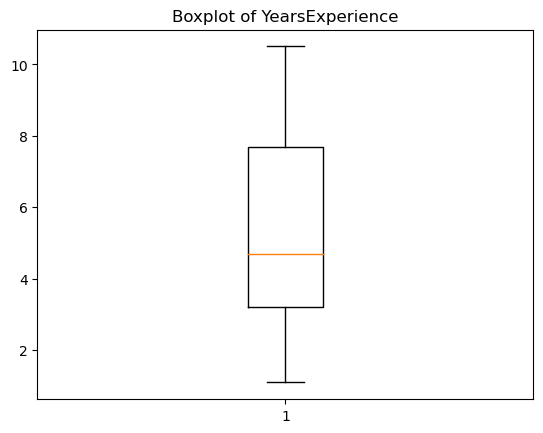

In [10]:
#boxplot
plt.boxplot(x='YearsExperience',data=salary_data)
plt.title("Boxplot of YearsExperience")
plt.show()

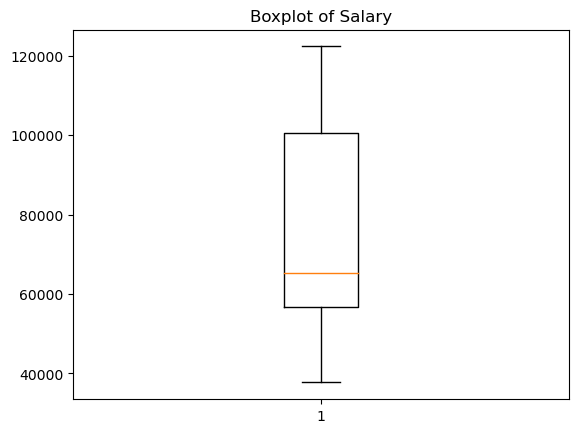

In [11]:
plt.boxplot(x='Salary',data=salary_data)
plt.title("Boxplot of Salary")
plt.show()

there are no outliers in our data

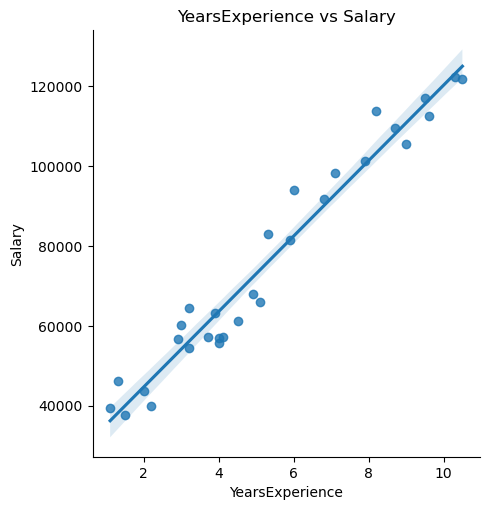

In [12]:
#linearity
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

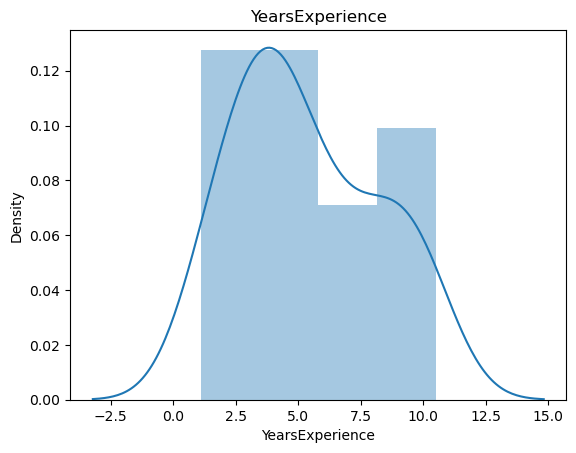

In [13]:
#Normality
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperience')
plt.show()

from above plot we can say that most of the data lie within group 2.5 - 7

# Model Building

In [14]:
salary_data=salary_data.rename(columns={"YearsExperience":"X",'Salary':'y'})
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [16]:
model = sm.ols('y~X',data=salary_data).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        10:57:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#parameters
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [19]:
#t-values and p-values
print(model.tvalues ,'\n', model.pvalues)

Intercept    11.346940
X            24.950094
dtype: float64 
 Intercept    5.511950e-12
X            1.143068e-20
dtype: float64


In [20]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

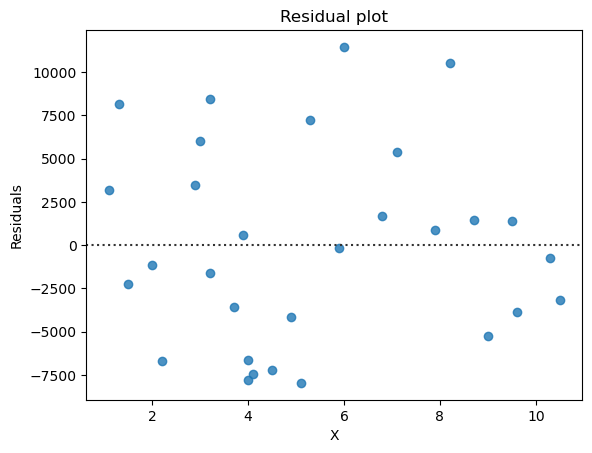

In [21]:
#Residual Plot
sns.residplot(x=salary_data['X'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

# Now we see that what r-square value and residual plot show us for transformed equations
By Using Different Transformations
1) Log Tranformation

In [22]:
salary_data['log_x'] = np.log(salary_data['X'])

In [24]:
model_1 = sm.ols('y~log_x',data=salary_data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        11:57:22   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 2. Quadratic model (SQRT Transformation)

In [25]:
salary_data['sqrt_x'] = np.sqrt(salary_data['X'])

In [27]:
model_2 = sm.ols('y~sqrt_x',data=salary_data).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        11:58:15   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

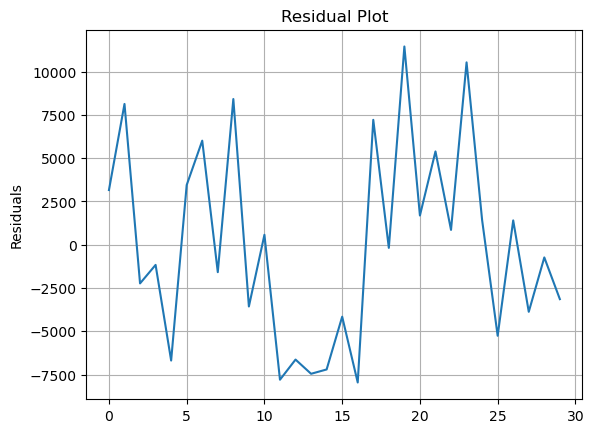

In [37]:
# Residual Plot
plt.plot(model.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Model Selection
Now by comparing r-square of all models,

we can say that the models which are fitted by using transformation

are not so good as compare to our model from raw data(original data)

Hence , we select our first model for further calculation

In [31]:
#for prediction
test_data=salary_data['X']

In [33]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64


In [34]:
actual = salary_data['y']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: y, dtype: float64

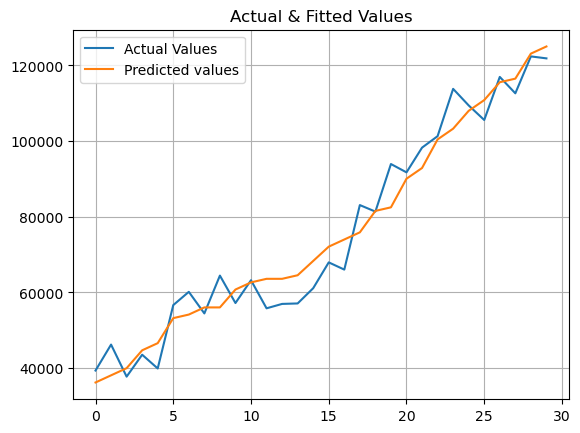

In [35]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

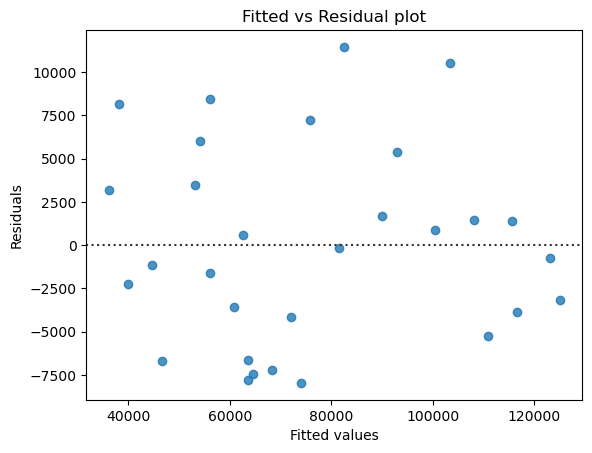

In [36]:
#Residual Vs Fitted Values Plot
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()